# Import and cleaning

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tkinter import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


df = pd.DataFrame(pd.read_csv('hour1.csv'))

In [3]:
df['dateday'] = pd.to_datetime(df['dateday'], format='%m/%d/%Y')
day = df.insert(loc=5, column='day', value=df['dateday'].dt.day)

In [4]:
df1 = df.copy()  # make a copy of the original dataframe

df1.loc[df1['holiday'] == 0, 'holiday'] = 'No'
df1.loc[df1['holiday'] == 1, 'holiday'] = 'Yes'

df1.loc[df1['workingday'] == 0, 'workingday'] = 'No'
df1.loc[df1['workingday'] == 1, 'workingday'] = 'Yes'

df1.loc[df1['season'] == 1, 'season'] = 'Winter'
df1.loc[df1['season'] == 2, 'season'] = 'Spring'
df1.loc[df1['season'] == 3, 'season'] = 'Summer'
df1.loc[df1['season'] == 4, 'season'] = 'Fall'

df1.loc[df1['weather'] == 1, 'weather'] = '1_Clear'
df1.loc[df1['weather'] == 2, 'weather'] = '2_Cloud'
df1.loc[df1['weather'] == 3, 'weather'] = '3_Light'
df1.loc[df1['weather'] == 4, 'weather'] = '4_Heavy'

In [5]:
display(df.head(1))
display(df1.head(1))

,instant,dateday,season,year,month,day,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-07-03,3,0,7,3,17,0,0,0,3,0.8,0.7424,0.49,0.8507,181,177,358


,instant,dateday,season,year,month,day,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-07-03,Summer,0,7,3,17,No,0,No,3_Light,0.8,0.7424,0.49,0.8507,181,177,358


In [35]:
df_year0 = df[df['year'] == 0]
df_year1 = df[df['year'] == 1]

# EDA

<AxesSubplot:xlabel='temp', ylabel='count'>

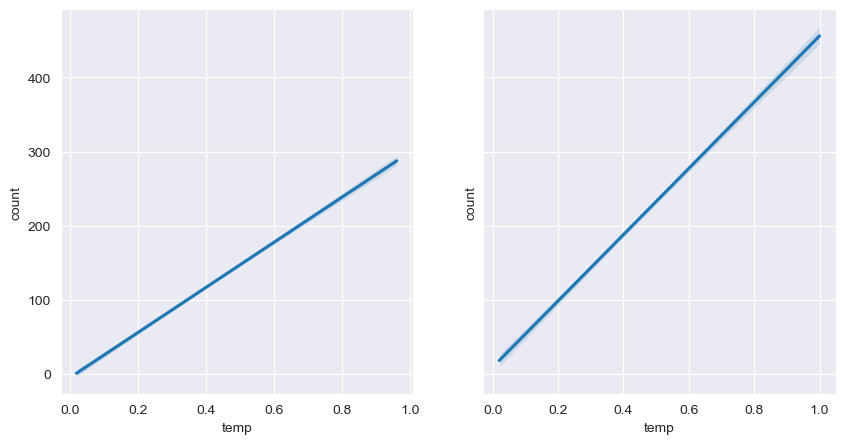

In [42]:
fig, axes = plt.subplots(ncols=2, sharey= True, figsize=(10, 5))

sns.regplot(data=df_year0, x='temp', y='count', scatter= False,  ax=axes[0])
sns.regplot(data=df_year1, x='temp', y='count', scatter= False,  ax=axes[1])


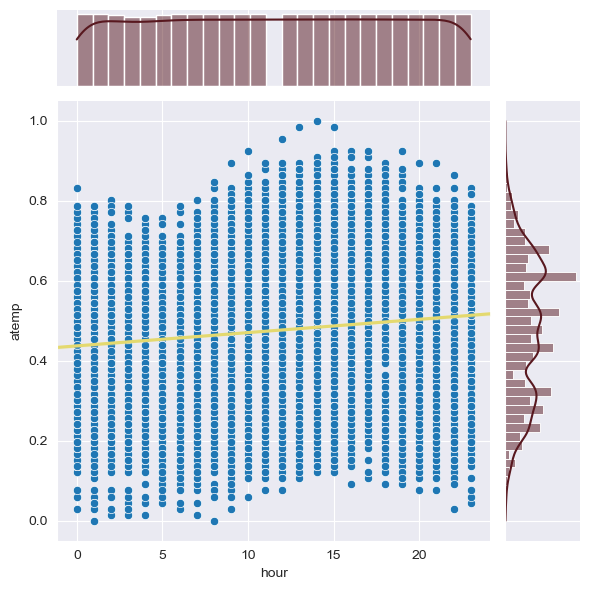

In [37]:
sns.set_style('darkgrid')

g = sns.JointGrid(data=df, x='hour', y='atemp')
g.plot_joint(sns.scatterplot)
g.plot_joint(sns.regplot, scatter=False, truncate=False, color= '#E4d96f')
g.plot_marginals(sns.histplot, kde=True, color= '#58181F')

plt.show()

In [50]:
#X = df.drop(columns=['instant', 'dateday', 'count', 'year', 'holiday', 'workingday'])
X = df[['atemp']]
y = df['count']


In [104]:
# showing each step to find the average count

search_data = df[(df['season'] == 3) & (df['holiday'] == 0) & (df['workingday'] == 1)]

find_average = search_data.loc[0:,'count']

average = int(np.average(find_average))

print(f'Average count: {average}')

Average count: 238


In [110]:
# all this can 
df[(df['season'] == 3) & # summer
    (df['holiday'] == 0) & # Not holiday
    (df['hour'] >= 7) &  # Starting from
    (df['hour'] <= 19) & # Ending at
    (df['workingday'] == 1)]['count'].max() # Only working days


977

# Building ML models

In [51]:
#splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  random_state=10)

In [54]:
from sklearn.linear_model import LinearRegression

# create the model
model = LinearRegression()

# fit the model to the data
model.fit(X_train, y_train)

# print the coefficients
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)


Coefficients: [426.5329834]
Intercept: -14.944797333452897
